# CodeAplha Internship Task-1

# Apple stock price prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from numpy import array
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\kavya\OneDrive\Desktop\data science\apple_share_price.csv")
df

,Date,Open,High,Low,Close,Volume
0,11-Aug-17,156.60,158.57,156.07,157.48,26257096
1,10-Aug-17,159.90,160.00,154.63,155.32,40804273
2,9-Aug-17,159.26,161.27,159.11,161.06,26131530
3,8-Aug-17,158.60,161.83,158.27,160.08,36205896
4,7-Aug-17,157.06,158.92,156.67,158.81,21870321
...,...,...,...,...,...,...
1659,7-Jan-11,47.71,48.05,47.41,48.02,77982212
1660,6-Jan-11,47.82,47.89,47.56,47.68,75106626
1661,5-Jan-11,47.08,47.76,47.07,47.71,63879193
1662,4-Jan-11,47.49,47.50,46.88,47.33,77337001


In [3]:
df.shape

(1664, 6)

In [4]:
df1=df.reset_index()['Close']
df1

0       157.48
1       155.32
2       161.06
3       160.08
4       158.81
         ...  
1659     48.02
1660     47.68
1661     47.71
1662     47.33
1663     47.08
Name: Close, Length: 1664, dtype: float64

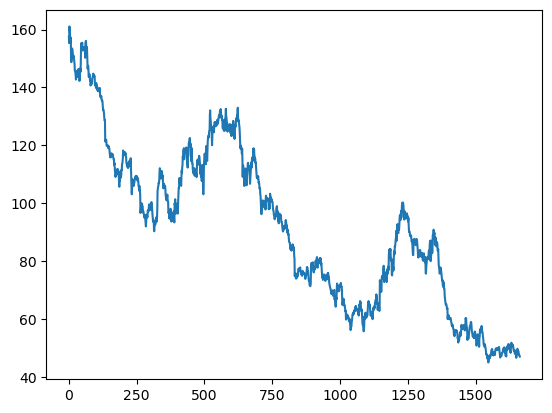

In [5]:
plt.plot(df1)
plt.show()

In [6]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.96914059],
       [0.95052151],
       [1.        ],
       ...,
       [0.02292906],
       [0.01965348],
       [0.01749849]])

In [7]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
print(training_size,test_size)

1081 583


In [8]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)

(980, 100)
(980,)
(482, 100)
(482,)


In [11]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=0)

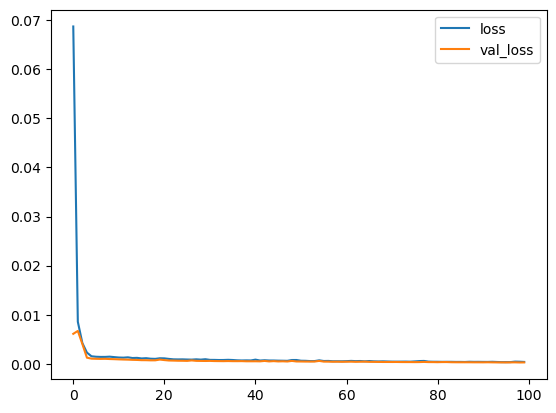

In [14]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();


In [15]:
train_predict=model.predict(X_train) #prediction
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 30ms/step


In [16]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
#Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(ytest,test_predict)))

101.27597307172
68.65227168162318


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


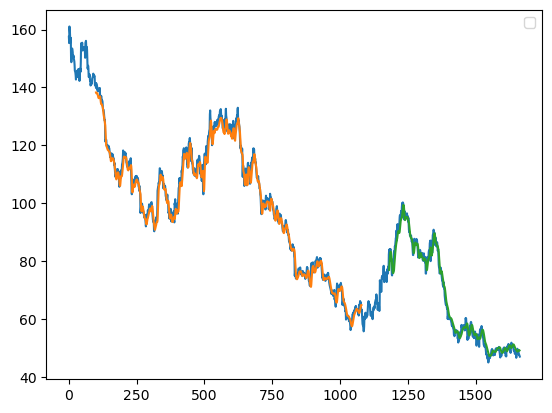

In [18]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()


In [19]:
x_input=test_data[483:].reshape(1,-1) #len(test_data)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [22]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.03258796]
101
1 day input [0.02077407 0.02344625 0.02448065 0.03103181 0.03016981 0.02560124
 0.02206706 0.03094561 0.03844496 0.03922076 0.04197914 0.03973795
 0.03853116 0.03870356 0.04215154 0.04042755 0.03810016 0.04284113
 0.03870356 0.04284113 0.04318593 0.04637531 0.04353073 0.03335919
 0.02775623 0.02034307 0.01491251 0.02103267 0.02560124 0.02103267
 0.01905008 0.02430825 0.02801483 0.02792863 0.02896302 0.0318076
 0.03594518 0.04085855 0.04094475 0.04387553 0.04318593 0.04456512
 0.03646237 0.02939402 0.0318076  0.02948022 0.01887768 0.02379105
 0.01801569 0.03706577 0.04706491 0.04508232 0.03853116 0.04568572
 0.04973709 0.04930609 0.05499526 0.05447806 0.04525472 0.04180674
 0.04663391 0.04042755 0.03387639 0.03361779 0.02861822 0.04335833
 0.05292647 0.05887423 0.05482286 0.05396087 0.05111628 0.0482717
 0.05275407 0.0490475  0.04499612 0.03835876 0.03456599 0.03568658
 0.03654857 0.02948022 0.02551504 0.03430739 0.03508318 0.0320662
 0.02723903 0.01396431 0.02137747 0.

In [23]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

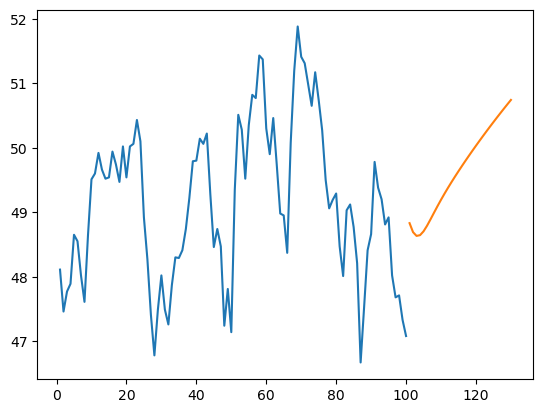

In [24]:
plt.plot(day_new,scaler.inverse_transform(df1[1564:])) #len(df1)
plt.plot(day_pred,scaler.inverse_transform(lst_output))

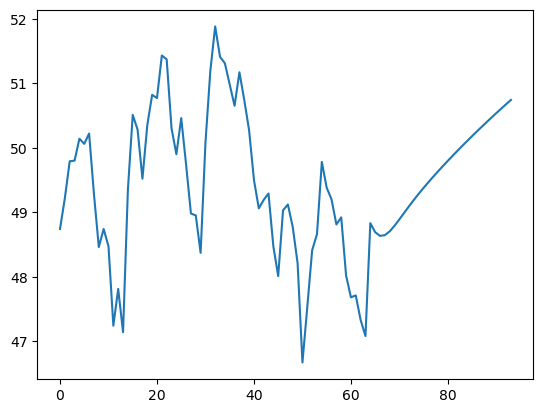

In [25]:
df3=df1.tolist()
df3.extend(lst_output)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3[1600:])

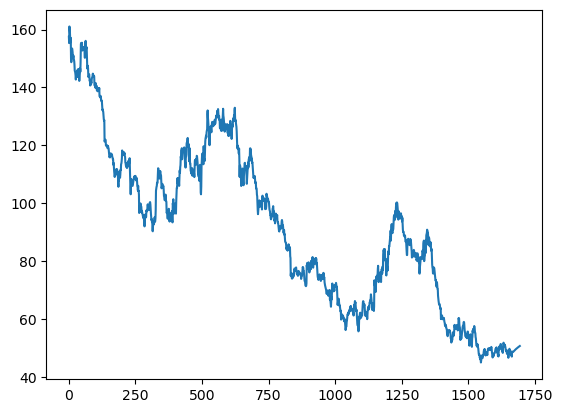

In [26]:
plt.plot(df3)